<a href="https://colab.research.google.com/github/chirag2saraiya/Session-6/blob/master/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.models import Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D,Conv2D
from keras.layers import Activation, Flatten, Input ,Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


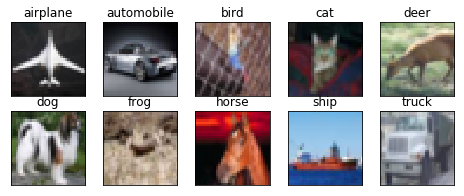

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
input = Input(shape=(32, 32, 3))

x1 = Convolution2D(32, 3, 3, border_mode='same', activation='relu', name='conv_1')(input) 
x1 = BatchNormalization()(x1)
x1 = Dropout(0.1)(x1)

#Spatially Seperable Convolution
x2 = Convolution2D(64, 3, 1, activation='relu',border_mode='same', name='conv_2')(x1)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.1)(x2)

x3 = Convolution2D(64, 1, 3, activation='relu',border_mode='same', name='conv_3')(x2) 
x3 = BatchNormalization()(x3)
x3 = Dropout(0.1)(x3)

#Depthwise convolution
x4 = SeparableConv2D(filters = 128, kernel_size = 3, strides = 1,  name='conv_4') (x3)
x4 = BatchNormalization()(x4)
x4 = Dropout(0.1)(x4)

x5 = MaxPooling2D(pool_size=(2, 2))(x4)

#Group convolution 3x3 and 5x5 
x6 = Conv2D(32, 3, 3, activation='relu',border_mode='same' , name='conv_5')(x5)
x6 = BatchNormalization()(x6)
x6 = Dropout(0.1)(x6)


x7 = Conv2D(64, 5, 5, activation='relu',border_mode='same' , name='conv_6')(x5)
x7 = BatchNormalization()(x7)
x7 = Dropout(0.1)(x7)

# merge input models
merge = concatenate([x6, x7])


x8 = Conv2D(32, 1, 1, activation='relu',border_mode='same', name='conv_7')(merge) 
x8 = BatchNormalization()(x8)
x8 = Dropout(0.1)(x8)

x9 = MaxPooling2D(pool_size=(2, 2))(x8)

#Group convolution with 3x3 with dilation =1 and 3x3 with dialation =2 

x10 = Convolution2D(32, 3, 3, activation='relu',border_mode='same', name='conv_8')(x9) 
x10 = BatchNormalization()(x10)
x10 = Dropout(0.1)(x10)


x11 = Convolution2D(64, 3, 3, activation='relu',border_mode='same', dilation_rate =2, name='conv_9')(x9)#  rec:(5x5)
x11 = BatchNormalization()(x11)
x11 = Dropout(0.1)(x11)


# merge input models
merge2 = concatenate([x10, x11])

x12 = Convolution2D(10, 7, 7, activation='relu', name='conv_10')(merge2) #  rec:(5x5)

x12= Flatten()(x12)

model = Model(inputs=[input], outputs=x12)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name="conv_1", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), activation="relu", name="conv_2", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), activation="relu", name="conv_3", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name="conv_5", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", name="conv_6", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", name="conv_7", padding="same")`

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         conv_1[0][0]                     
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv_2 (Co

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7), activation="relu", name="conv_10")`


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 37s 96ms/step - loss: 2.0234 - acc: 0.3379 - val_loss: 10.9976 - val_acc: 0.1512
Epoch 2/50
390/390 [==============================] - 33s 84ms/step - loss: 1.9564 - acc: 0.3197 - val_loss: 5.2085 - val_acc: 0.1706
Epoch 3/50
390/390 [==============================] - 33s 84ms/step - loss: 1.8145 - acc: 0.3902 - val_loss: 2.2437 - val_acc: 0.3544
Epoch 4/50
390/390 [==============================] - 32s 83ms/step - loss: 1.7536 - acc: 0.4281 - val_loss: 2.1195 - val_acc: 0.4001
Epoch 5/50
390/390 [==============================] - 33s 83ms/step - loss: 1.8558 - acc: 0.3929 - val_loss: 3.0467 - val_acc: 0.3001
Epoch 6/50
390/390 [==============================] - 32s 83ms/step - loss: 1.7066 - acc: 0.4268 - val_loss: 2.1167 - val_acc: 0.4069
Epoch 7/50
390/390 [==============================] - 33s 84ms/step - loss: 1.9306 - acc: 0.3690 - val_loss: 5.7776 - val_acc: 0.1745
Epoch 8/50
390/390 [==============================] - 33s 84m

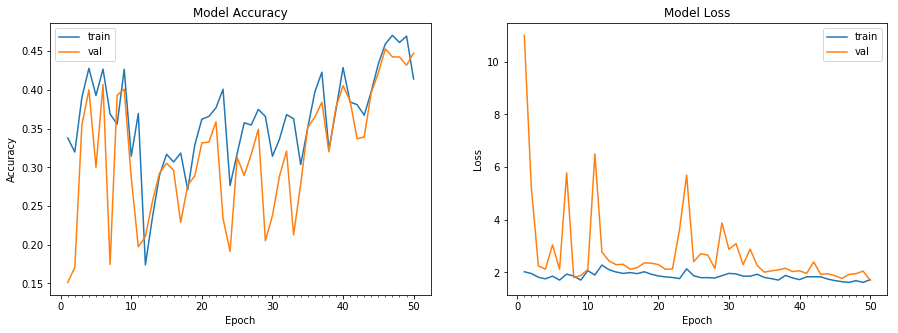

Accuracy on test data is: 44.76


In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))